# Pretrained Models - Kunskapskontroll

**Obligatoriskt att fylla i uppgifterna nedan.**

Namn: Jakob Rask

Vem du har presenterat för: Bushra Bushra Tazyeen och Xiaowen Chen.

Datum då du presenterade: 2024-05-08

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation: 
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = ResNet50(weights='imagenet')

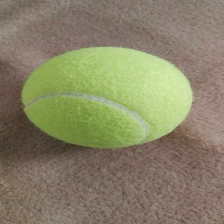

In [3]:
# img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
img_path = 'tennisboll.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [4]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [5]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [6]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
x = preprocess_input(x)

In [7]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 [==============================] - 1s 1s/step
Predicted: [('n04409515', 'tennis_ball', 0.9999969), ('n04039381', 'racket', 2.7498354e-06), ('n03942813', 'ping-pong_ball', 5.5182866e-08)]


# 1. Take some pictures yourself and predict their class.

1/1 [==============================] - 0s 100ms/step
Image 1: [('n07749582', 'lemon', 0.56077814), ('n07747607', 'orange', 0.33123547), ('n03942813', 'ping-pong_ball', 0.051647186)]
1/1 [==============================] - 0s 77ms/step
Image 2: [('n07749582', 'lemon', 0.70079225), ('n04409515', 'tennis_ball', 0.12420536), ('n07747607', 'orange', 0.065847374)]
1/1 [==============================] - 0s 81ms/step
Image 3: [('n11939491', 'daisy', 0.9998789), ('n02165456', 'ladybug', 3.348673e-05), ('n02206856', 'bee', 1.3476369e-05)]
1/1 [==============================] - 0s 71ms/step
Image 4: [('n03481172', 'hammer', 0.9882201), ('n03498962', 'hatchet', 0.009431703), ('n03804744', 'nail', 0.002135731)]


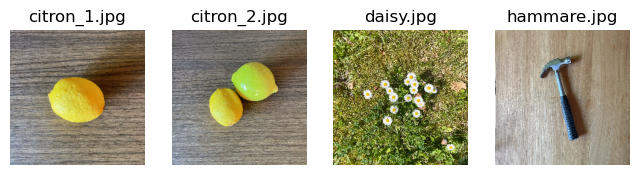

In [8]:
# load images and resize to 224x224 with cropping to keep aspect ratio
photos = ['citron_1.jpg', 'citron_2.jpg', 'daisy.jpg', 'hammare.jpg']
fig = plt.figure(figsize=(8, 32)) 
n = 1

for img in photos:
    img = image.load_img(img, target_size=(224, 224), keep_aspect_ratio=True)
    fig.add_subplot(1, len(photos), n)
    plt.imshow(img)
    plt.axis('off') 
    plt.title(photos[n-1]) 
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    print(f'Image {n}:', decode_predictions(predictions, top=3)[0])
    n += 1

## Diskussion

Hammaren och Tusensköna (Daisy) gick mycket bra att prediktera. Det hade kanske varit svårare att prediktera en ensam blomma på ett bord. Troligtvis har modellen mest tränat på bilder av blommor i sin rätta miljö (t.ex. gräsmatta).
Citronerna gick ganska bra men det verkar även finnas likheter med tennisboll eller apelsin. Det kanske kan bero på den runda formen eller att citronens karaktärsdrag inte är tillräckligt tydliga i de nya bilderna. Det gick lite bättre med två citroner, antingen för att modellen har tränat på bilder med fler än en citron eller för att den andra citronen har tydligare karaktärsdrag av en citron.

# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

Att använda "pretrained models" är mycket effektivt eftersom vi inte behöver träna en modell helt från grunden. <br>
Vi kan, som i exemplet ovan, använda en färdig modell för att prediktera nya bilder. <br>
Vi kan även utgå från en färdig modell om vi vill att modellen ska kunna utföra en liknande uppgift med liknande data. Vi kan då behålla de nedre lagrena och bara träna om något/några av de övre lagrena eller bara förändra ouput-lagret. Det innebär att vi behåller och utgår från de mindre byggstenarna/pusselbitarna som modellen är tränad på i de nedre lagrena. Det kräver då inte heller så stora nya datamängder. 